In [117]:
import tensorflow as tf
import matplotlib
import seaborn 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import reuters
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


## Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ÌôïÏù∏

In [88]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [89]:
print(f'ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: {len(x_train)}')
print('ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: {}'.format(len(x_test)))

ÌõàÎ†® ÏÉòÌîåÏùò Ïàò: 8982
ÌÖåÏä§Ìä∏ ÏÉòÌîåÏùò Ïàò: 2246


ÏÉòÌîåÏàòÎäî ÎèôÏùºÌïòÏßÄÎßå num_words=5000Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê 5000 Ïù¥ÌõÑ Ïù∏Îç±Ïä§Îäî unkÎ°ú Ï±ÑÏõåÏßê 

In [23]:
num_classes = max(y_train) + 1
print('ÌÅ¥ÎûòÏä§Ïùò Ïàò : {}'.format(num_classes))

ÌÅ¥ÎûòÏä§Ïùò Ïàò : 46


### Îã®Ïñ¥Í∏∏Ïù¥ Î∂ÑÌè¨ÌôïÏù∏

ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :2376
ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :145.5398574927633


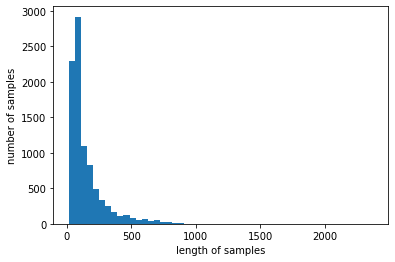

In [24]:
print('ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :{}'.format(max(len(l) for l in x_train)))
print('ÌõàÎ†®Ïö© Îâ¥Ïä§Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### class Î∂ÑÌè¨ ÌôïÏù∏

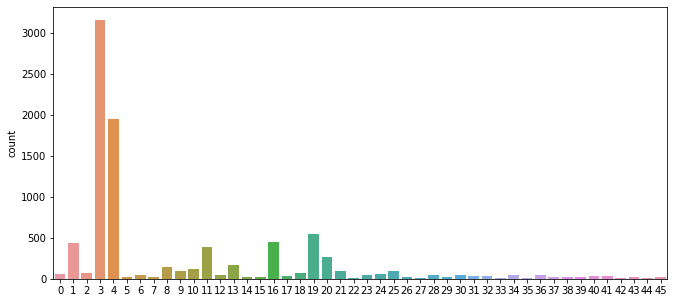

In [26]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

### Ï†ïÏàò ÏãúÌÄÄÏä§Î•º ÌÖçÏä§Ìä∏Î°ú Î≥µÏõêÌïú ÌõÑ, TF-IDF Î≤°ÌÑ∞ÌôîÌïòÎäî Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [76]:
def preprocess_text(x_train,x_test):
    word_index = reuters.get_word_index(path="reuters_word_index.json")
    index_to_word = {index+3 : word for word, index in word_index.items()}
    for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
      index_to_word[index]=token
    
    train_decoded = []
    for i in range(len(x_train)):
        t = ' '.join([index_to_word[index] for index in x_train[i]])
        train_decoded.append(t)

    x_train = train_decoded
    
    test_decoded = []
    for i in range(len(x_test)):
        t = ' '.join([index_to_word[index] for index in x_test[i]])
        test_decoded.append(t)

    x_test = test_decoded
    
    
    dtmvector = CountVectorizer()
    x_train_dtm = dtmvector.fit_transform(x_train)
    x_test_dtm = dtmvector.transform(x_test)
    
    tfidf_transformer = TfidfTransformer()
    tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
    tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

    return tfidfv, tfidfv_test

In [90]:
tfidfv, tfidfv_test = preprocess_text(x_train,x_test)

### F1-Scoer

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Model ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏

In [ ]:
from sklearn.naive_bayes import MultinomialNB #Îã§Ìï≠Î∂ÑÌè¨ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #Ï†ïÌôïÎèÑ¬†Í≥ÑÏÇ∞

In [97]:
def logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test):
    # Î™®Îç∏ ÌïôÏäµ
    lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
    lr.fit(tfidfv,y_train)
    # Î™®Îç∏ ÌÖåÏä§Ìä∏
    predicted = lr.predict(tfidfv_test) #ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
    # Î≥¥Í≥†ÏÑú Î¶¨ÌÑ¥
    return classification_report(y_test,predicted,zero_division=0)

In [98]:
def random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test):
    # Î™®Îç∏ ÌïôÏäµ
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    # Î™®Îç∏ ÌÖåÏä§Ìä∏
    predicted = forest.predict(tfidfv_test)
    # Î≥¥Í≥†ÏÑú Î¶¨ÌÑ¥
    return classification_report(y_test,predicted,zero_division=0)

## Îã®Ïñ¥ Ïàò 5000 | 1Î≤àÏß∏ Ïã§Ìóò (Logistic Regrassion, Random Tree)

In [91]:
print(logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.77      0.75       105
           2       0.76      0.80      0.78        20
           3       0.90      0.93      0.91       813
           4       0.80      0.86      0.83       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.66      0.71      0.68        38
           9       0.81      0.88      0.85        25
          10       0.89      0.83      0.86        30
          11       0.64      0.73      0.69        83
          12       0.57      0.31      0.40        13
          13       0.63      0.65      0.64        37
          14       0.50      0.50      0.50         2
          15       0.75      0.33      0.46         9
          16       0.70      0.75      0.73        99
          17       0.80    

In [69]:
print(random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.70      0.67      0.68        99
          17       0.00    

| Î™®Îç∏ Ïù¥Î¶Ñ            | Îã®Ïñ¥ Ïàò (`num_words`) | Accuracy | F1-Score (weighted avg) |
|---------------------|------------------------|----------|--------------------------|
| Logistic Regression | 5,000                  | 0.80     | 0.80                     |
| Random Forest       | 5,000                  | 0.70     | 0.68                     |


## Ïù∏ÏÇ¨Ïù¥Ìä∏
+ Random ForestÎ≥¥Îã§ Logistic RegressionÏù¥ Ï†ïÌôïÎèÑ, F1-Score Îëê Í∞ÄÏßÄ Ï∏°Î©¥ Î™®ÎëêÏóêÏÑú Ïö∞ÏàòÌï®ÏùÑ Î≥¥ÏûÑ

## Îã®Ïñ¥ Ïàò 10000 | 2Î≤àÏß∏ Ïã§Ìóò (Logistic Regrassion, Random Tree)

In [113]:
# Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î°úÎìú
word_index = reuters.get_word_index(path="reuters_word_index.json")

# Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò Ï∂úÎ†•
print("Î°úÏù¥ÌÑ∞ Îâ¥Ïä§ Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò:", len(word_index))

Î°úÏù¥ÌÑ∞ Îâ¥Ïä§ Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò: 30979


In [74]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [77]:
tfidfv, tfidfv_test = preprocess_text(x_train,x_test)

In [83]:
print(logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.78      0.76       105
           2       0.70      0.70      0.70        20
           3       0.91      0.93      0.92       813
           4       0.80      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.67      0.72      0.70        83
          12       0.62      0.38      0.48        13
          13       0.65      0.59      0.62        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.71      0.77      0.74        99
          17       0.80    

In [80]:
print(random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.22      0.33      0.27        12
           1       0.45      0.77      0.57       105
           2       0.30      0.30      0.30        20
           3       0.82      0.90      0.86       813
           4       0.61      0.83      0.70       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.67      0.53      0.59        38
           9       0.70      0.28      0.40        25
          10       0.75      0.30      0.43        30
          11       0.55      0.59      0.57        83
          12       0.40      0.15      0.22        13
          13       0.37      0.19      0.25        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.59      0.59        99
          17       0.00    

| Î™®Îç∏ Ïù¥Î¶Ñ            | Îã®Ïñ¥ Ïàò (`num_words`) | Accuracy | F1-Score (weighted avg) |
|---------------------|------------------------|----------|--------------------------|
| Logistic Regression | 10,000                 | 0.81     | 0.81                     |
| Random Forest       | 10,000                 | 0.67     | 0.64                     |


## Ïù∏ÏÇ¨Ïù¥Ìä∏
+ Îã®Ïñ¥ Ïàò 10,000ÏúºÎ°ú ÎäòÎ†∏ÏùÑ Îïå Logistic RegressionÏùò ÏÑ±Îä•ÏùÄ ÏÜåÌè≠ ÏÉÅÏäπÌïòÏòÄÏúºÎÇò Random ForestÎäî ÏÑ±Îä•Ïù¥ Í∞êÏÜåÌï®

## Îã®Ïñ¥ Ïàò 15000 | 3Î≤àÏß∏ Ïã§Ìóò (Logistic Regrassion, Random Tree)

In [94]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000, test_split=0.2)

In [95]:
tfidfv, tfidfv_test = preprocess_text(x_train,x_test)

In [99]:
print(logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73      0.79      0.76       105
           2       0.78      0.70      0.74        20
           3       0.92      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.71      0.71      0.71        38
           9       0.85      0.88      0.86        25
          10       0.93      0.87      0.90        30
          11       0.68      0.72      0.70        83
          12       0.62      0.38      0.48        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.70      0.77      0.73        99
          17       0.82    

In [101]:
print(random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33        12
           1       0.42      0.69      0.52       105
           2       0.13      0.10      0.11        20
           3       0.81      0.90      0.85       813
           4       0.65      0.85      0.74       474
           5       0.00      0.00      0.00         5
           6       0.83      0.36      0.50        14
           7       0.50      0.67      0.57         3
           8       0.62      0.53      0.57        38
           9       0.71      0.40      0.51        25
          10       0.60      0.20      0.30        30
          11       0.45      0.51      0.47        83
          12       0.60      0.23      0.33        13
          13       0.40      0.22      0.28        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.55      0.46      0.50        99
          17       0.00    

| Î™®Îç∏ Ïù¥Î¶Ñ            | Îã®Ïñ¥ Ïàò (`num_words`) | Accuracy | F1-Score (weighted avg) |
|---------------------|------------------------|----------|--------------------------|
| Logistic Regression | 15,000                 | 0.81     | 0.81                     |
| Random Forest       | 15,000                 | 0.67     | 0.64                     |


### Ïù∏ÏÇ¨Ïù¥Ìä∏
+ 10000Í∞úÏùò Îã®Ïñ¥Î•º ÏÇ¨Ïö©ÌñàÏùÑ ÎïåÏôÄ ÏÑ±Îä•Ï∞®Ïù¥Í∞Ä ÏóÜÏùå
+ Í∞ÄÏ§ëÏπòÎ•º ÎëêÏßÄÏïäÎäî macro avgÎäî ÏïΩÍ∞ÑÏùò Í∞êÏÜåÍ∞Ä ÎÇòÌÉÄÎÇ®

## Îã®Ïñ¥ Ïàò None(Ï†úÌïú ÏóÜÏùå) | 4Î≤àÏß∏ Ïã§Ìóò (Logistic Regrassion, Random Tree)

In [105]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [106]:
tfidfv, tfidfv_test = preprocess_text(x_train,x_test)

In [107]:
print(logistic_regression_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.79      0.77       105
           2       0.78      0.70      0.74        20
           3       0.92      0.93      0.93       813
           4       0.81      0.88      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.85      0.88      0.86        25
          10       0.93      0.90      0.92        30
          11       0.67      0.72      0.69        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.80      0.44      0.57         9
          16       0.71      0.77      0.74        99
          17       0.82    

In [108]:
print(random_forest_fit_test(tfidfv,y_train,tfidfv_test,y_test))

              precision    recall  f1-score   support

           0       0.25      0.58      0.35        12
           1       0.35      0.60      0.44       105
           2       0.32      0.40      0.36        20
           3       0.82      0.89      0.85       813
           4       0.62      0.84      0.71       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.51      0.47      0.49        38
           9       1.00      0.28      0.44        25
          10       0.46      0.20      0.28        30
          11       0.56      0.64      0.60        83
          12       0.40      0.15      0.22        13
          13       0.33      0.16      0.22        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.46      0.52        99
          17       0.00    

| Î™®Îç∏ Ïù¥Î¶Ñ            | Îã®Ïñ¥ Ïàò (`num_words`) | Accuracy | F1-Score (weighted avg) |
|---------------------|------------------------|----------|--------------------------|
| Logistic Regression | None(30,979)                 | 0.82     | 0.81                     |
| Random Forest       | None(30,979)                 | 0.65     | 0.62                     |


### Ïù∏ÏÇ¨Ïù¥Ìä∏
+ Logistic RegressionÏùÄ Îã®Ïñ¥ ÏàòÎ•º ÏµúÎåÄÎ°ú ÌñàÏùÑ Îïå Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏Îã§.
+ Random ForestÎäî ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ïßê

### Í≤ΩÌñ•ÏÑ± ÏãúÍ∞ÅÌôî Í∑∏ÎûòÌîÑ

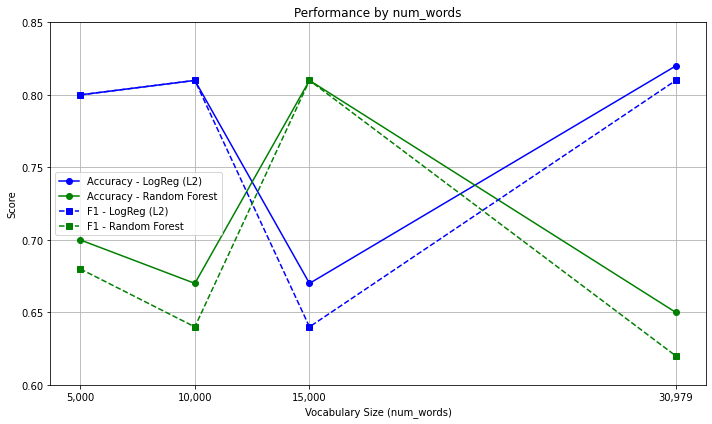

In [116]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò
word_counts = [5000, 5000, 10000, 10000, 15000, 15000, 30979, 30979]
accuracy =     [0.80, 0.70, 0.81, 0.67, 0.67, 0.81, 0.82, 0.65]
f1_score =     [0.80, 0.68, 0.81, 0.64, 0.64, 0.81, 0.81, 0.62]

# Î™®Îç∏ Î∂ÑÎ¶¨ (ÏßùÏàò Ïù∏Îç±Ïä§: LogReg, ÌôÄÏàò Ïù∏Îç±Ïä§: RF)
x_logreg = word_counts[::2]
x_rf = word_counts[1::2]
acc_logreg = accuracy[::2]
acc_rf = accuracy[1::2]
f1_logreg = f1_score[::2]
f1_rf = f1_score[1::2]

# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
plt.figure(figsize=(10, 6))
plt.plot(x_logreg, acc_logreg, marker='o', label='Accuracy - LogReg (L2)', color='blue')
plt.plot(x_rf, acc_rf, marker='o', label='Accuracy - Random Forest', color='green')
plt.plot(x_logreg, f1_logreg, marker='s', linestyle='--', label='F1 - LogReg (L2)', color='blue')
plt.plot(x_rf, f1_rf, marker='s', linestyle='--', label='F1 - Random Forest', color='green')

# xÏ∂ï: Î™ÖÏãúÏ†Å ÎààÍ∏àÍ≥º ÎùºÎ≤®
xticks = [5000, 10000, 15000, 30979]
xtick_labels = ['5,000', '10,000', '15,000', '30,979']
plt.xticks(xticks, labels=xtick_labels)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title('Performance by num_words')
plt.xlabel('Vocabulary Size (num_words)')
plt.ylabel('Score')
plt.ylim(0.6, 0.85)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


| Îã®Ïñ¥ Ïàò (`num_words`) | Î™®Îç∏                 | Accuracy | F1-Score (weighted avg) |
|------------------------|----------------------|----------|--------------------------|
| 5,000                 | Logistic Regression  | 0.80     | 0.80                     |
| 5,000                 | Random Forest         | 0.70     | 0.68                     |
| 10,000                | Logistic Regression  | 0.81     | 0.81                     |
| 10,000                | Random Forest         | 0.67     | 0.64                     |
| 15,000                | Logistic Regression  | 0.81     | 0.81                     |
| 15,000                | Random Forest         | 0.67     | 0.64                     |
| 30,979 (Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò) | Logistic Regression  | 0.82     | 0.81                     |
| 30,979 (Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò) | Random Forest         | 0.65     | 0.62                     |


### Ï†ÑÏ≤¥ Ïù∏ÏÇ¨Ïù¥Ìä∏

| Î™®Îç∏                  | penalty/Í∑úÏ†ú      | Î≤°ÌÑ∞Ìôî                        | Îã®Ïñ¥ Ïàò Ïã§ÌóòÍ∞í                     |
| ------------------- | --------------- | -------------------------- | ---------------------------- |
| Logistic‚ÄØRegression | L2, `C=default` | `CountVectorizer + TF‚ÄëIDF` | 5‚ÄØk, 10‚ÄØk, 15‚ÄØk, all(30‚ÄØ979) |
| Random‚ÄØForest       | Í∏∞Î≥∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞      | ÎèôÏùº                         | 5‚ÄØk, 10‚ÄØk, 15‚ÄØk, all         |

+ Îã®Ïñ¥ ÏàòÏóê Îî∞Î•∏ ÏÑ±Îä•Ïù¥ Îëê Î™®Îç∏Ïù¥ Î∞òÎåÄÎêòÎäî Í≤ΩÌñ•ÏÑ±ÏùÑ Î≥¥ÏûÑ
+ Logistic RegressionÏù¥ Random ForestÏóê ÎπÑÌï¥ ÏÑ±Îä•Ïùò Î≥ÄÎèôÏù¥ Ï†ÅÏùå L2 Í∑úÏ†úÎ°ú Ïù∏Ìï¥ Í∑∏Î†áÎã§Í≥† ÏÉùÍ∞ÅÎê®

| Îã®Ïñ¥ Ïàò (`num_words`) | Î™®Îç∏                 | Accuracy | F1-Score (weighted avg) |
|------------------------|----------------------|----------|--------------------------|
| 5,000                 | Logistic Regression  | 0.80     | 0.80                     |
| 5,000                 | Random Forest         | 0.70     | 0.68                     |
| 30,979 (Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò) | Logistic Regression  | 0.82     | 0.81                     |
| 30,979 (Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò) | Random Forest         | 0.65     | 0.62                     |

+ Í∑πÎã®Ï†ÅÏù∏ Îëê Îã®Ïñ¥ ÏàòÎ•º ÎπÑÍµêÌï¥Î≥¥Î©¥ Í∑úÏ†úÏùò Ìö®Í≥ºÍ∞Ä ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏùå

| Ìï≠Î™©             | **Logistic Regression**               | **Random Forest**                                     |
| -------------- | ------------------------------------- | ----------------------------------------------------- |
| **Î™®Îç∏ Íµ¨Ï°∞**      | ÏÑ†Ìòï Î™®Îç∏ (Í∞ÄÏ§ëÏπòÏùò ÏÑ†Ìòï Í≤∞Ìï©)                    | Ìä∏Î¶¨ Í∏∞Î∞ò ÎπÑÏÑ†Ìòï Î™®Îç∏ (ÏïôÏÉÅÎ∏î)                                    |
| **ÌäπÏÑ± ÏÑ†ÌÉù Î∞©Ïãù**   | Ï†ÑÏ≤¥ featureÎ•º ÎèôÏãúÏóê ÏÇ¨Ïö©Ìï¥ ÏÑ†Ìòï Í≤∞Ìï©             | Í∞Å Ìä∏Î¶¨ÏóêÏÑú featureÎ•º Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Î∂ÑÌï†                           |

+ Î™®Îç∏Ïùò ÌäπÏÑ± ÏÉÅ Î™®Îì† featureÎ•º ÎèôÏãúÏóê Í≥†Î†§ÌïòÍ≥†, Ï§ëÏöîÌïòÏßÄ ÏïäÏùÄ Îã®Ïñ¥Îäî Í∞ÄÏ§ëÏπòÍ∞Ä Í±∞Ïùò 0Ïù¥ Îê®
Í≥†Ï∞®ÏõêÏóêÏÑú Ï§ëÏöîÌïú feature Î™á Í∞úÎßå ÏûàÏñ¥ÎèÑ Î∂ÑÎ•òÍ∞Ä Í∞ÄÎä•ÌïòÏó¨ ÏÑ±Îä•Ïù¥ ÎÜíÍ≤åÎÇòÏò¥
+ Ìä∏Î¶¨ Í∏∞Î∞ò Î™®Îç∏ÏùÄ Í∞Å ÎÖ∏ÎìúÏóêÏÑú ÌïòÎÇòÏùò featureÎßå Î≥¥Í≥† Î∂ÑÍ∏∞Ìï®
Í≥†Ï∞®Ïõê Ìù¨ÏÜåÌñâÎ†¨ ÌôòÍ≤ΩÏóêÏÑú ÎÖ∏Ïù¥Ï¶à ÌäπÏÑ±Ïóê ÏâΩÍ≤å Í≥ºÏ†ÅÌôîÎêòÏñ¥ ÏÑ±Îä•Ïù¥ ÎÇÆÏùå


#### Îëê Î™®Îç∏ Î™®ÎëêÏóêÏÑú Ï§ÄÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Î©¥ÏÑú Îã®Ïñ¥ ÏàòÎèÑ Ï†ÅÏùÄÌé∏Ïù¥Îùº ÌïôÏäµÏãúÍ∞ÑÏù¥ ÏßßÏùÄ Îã®Ïñ¥ Ïàò 10,000Ïù¥ ÏµúÏ†ÅÏúºÎ°ú ÌåêÎã®
#### Ï∞®Ïõê ÏàòÍ∞Ä ÎßéÍ≥† Ìù¨ÏÜåÌñâÎ†¨Ïù¥ ÎßéÏùÑ Í≤ΩÏö∞ Ï†ÑÏ≤¥ featureÎ•º Í≥†Î†§ÌïòÎäî Î™®Îç∏Ïù¥ ÎÜíÏùÄ ÏÑ±Îä•Ïù¥ Í∏∞ÎåÄÎê®

## Îî•Îü¨Îãù Î™®Îç∏ (LSTM)

In [144]:
# 1. ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ import
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import numpy as np

# 2. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
num_words = 10000       # ÏÇ¨Ïö©Ìï† ÏµúÎåÄ Îã®Ïñ¥ Ïàò
max_len = 200           # ÏãúÌÄÄÏä§ ÏµúÎåÄ Í∏∏Ïù¥
embedding_dim = 128     # ÏûÑÎ≤†Îî© Ï∞®Ïõê
batch_size = 128
epochs = 20

# 3. Îç∞Ïù¥ÌÑ∞ Î°úÎî©
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

# 4. ÏãúÌÄÄÏä§ Ìå®Îî©
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# 5. ÌÅ¥ÎûòÏä§ Ïàò ÏûêÎèô Í≥ÑÏÇ∞ ÌõÑ one-hot Ïù∏ÏΩîÎî©
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 6. LSTM Î™®Îç∏ Ï†ïÏùò
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(units=256),
    Dropout(0.3),
    Dense(units=num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 7. ÏΩúÎ∞± ÏÑ§Ï†ï (Ï°∞Í∏∞ Ï¢ÖÎ£å)
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True, verbose=1)

# 8. Î™®Îç∏ ÌïôÏäµ
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
57/57 [==============================] - 4s 38ms/step - loss: 2.6280 - accuracy: 0.3280 - val_loss: 2.3962 - val_accuracy: 0.3450
Epoch 2/20
57/57 [==============================] - 2s 31ms/step - loss: 2.2108 - accuracy: 0.4205 - val_loss: 1.9403 - val_accuracy: 0.4808
Epoch 3/20
57/57 [==============================] - 2s 31ms/step - loss: 1.7782 - accuracy: 0.5258 - val_loss: 1.7708 - val_accuracy: 0.5331
Epoch 4/20
57/57 [==============================] - 2s 31ms/step - loss: 1.6042 - accuracy: 0.5761 - val_loss: 1.8458 - val_accuracy: 0.5125
Epoch 5/20
57/57 [==============================] - 2s 31ms/step - loss: 1.6232 - accuracy: 0.5630 - val_loss: 1.6130 - val_accuracy: 0.5765
Epoch 6/20
57/57 [==============================] - 2s 31ms/step - loss: 1.3502 - accuracy: 0.6412 - val_loss: 1.5409 - val_accuracy: 0.6088
Epoch 7/20
57/57 [==============================] - 2s 31ms/step - loss: 1.2639 - accuracy: 0.6675 - val_loss: 1.4908 - val_accuracy: 0.6333
Epoch 8/20
57

In [146]:
# 9. ÌèâÍ∞Ä Î∞è Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nüìä Classification Report:")
print(classification_report(y_true, y_pred))


üìä Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.32      0.77      0.45       105
           2       0.00      0.00      0.00        20
           3       0.89      0.92      0.90       813
           4       0.81      0.81      0.81       474
           5       0.00      0.00      0.00         5
           6       0.33      0.07      0.12        14
           7       0.00      0.00      0.00         3
           8       0.31      0.53      0.39        38
           9       0.18      0.32      0.23        25
          10       0.10      0.10      0.10        30
          11       0.39      0.54      0.45        83
          12       0.00      0.00      0.00        13
          13       0.16      0.14      0.15        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.41      0.49      0.45        9

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


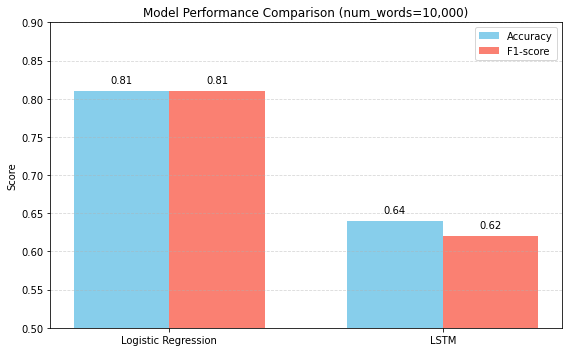

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Î™®Îç∏ Ïù¥Î¶Ñ
models = ['Logistic Regression', 'LSTM']

# ÏÑ±Îä• ÏßÄÌëú
accuracy = [0.81, 0.64]
f1_score = [0.81, 0.62]

x = np.arange(len(models))  # [0, 1]
width = 0.35  # ÎßâÎåÄ ÎÑàÎπÑ

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1_score, width, label='F1-score', color='salmon')

# ÎùºÎ≤® & ÎààÍ∏à
plt.xticks(x, models)
plt.ylim(0.5, 0.90)
plt.ylabel('Score')
plt.title('Model Performance Comparison (num_words=10,000)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# ÏàòÏπò ÌëúÏãú
for i in range(len(models)):
    plt.text(x[i] - width/2, accuracy[i] + 0.01, f"{accuracy[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, f1_score[i] + 0.01, f"{f1_score[i]:.2f}", ha='center')

plt.tight_layout()
plt.show()


+ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Î≥¥Îã§ Îî•Îü¨Îãù Î™®Îç∏ÏóêÏÑú Ìõ®Ïî¨ ÎÇÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ
+ Îç∞Ïù¥ÌÑ∞ÏàòÍ∞Ä ÎßéÏùÄ Ìé∏Ïù¥ ÏïÑÎãàÎùº Í∑∏Îü∞ Í≤ÉÏúºÎ°ú Ï∂îÏ∏°Îê®
+ Îî•Îü¨Îãù Î™®Îç∏Ïùò Ï∏µÏùÑ ÏàòÏ†ïÌïòÎ©¥ Îçî ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïùº Ïó¨ÏßÄÍ∞Ä Ï°¥Ïû¨Ìï®

## ÌöåÍ≥†

Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎ•º Í≥†Î†§ÌïòÏó¨ Îî•Îü¨ÎãùÎ≥¥Îã§ Î®∏Ïã†Îü¨ÎãùÏù¥ Ïú†Ïö©Ìï† ÎïåÎèÑ ÏûàÎã§Îäî ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§.
Ï†ÄÎ≤à DLthonÏùò Í≤ΩÌóòÏùÑ ÏÇ¥Î†§ÏÑú ÏÉùÍ∞ÅÌñàÏùÑ Îïå Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ïÏùÑÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎ•º ÎäòÎ¶¨Í≥† Î™®Îç∏ÏùÑ Î≥ÄÍ≤ΩÌïúÎã§Î©¥
Í≥†Ï†êÏùÄ Îî•Îü¨ÎãùÏù¥ ÎÜíÏùÄ Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÎêúÎã§. (ÌãÄÎ¶¥ ÏàòÎèÑ ÏûàÏùå)
Í∞Å Î™®Îç∏Ïùò Íµ¨Ï°∞Ï†Å ÌäπÏÑ±ÏùÑ ÌååÏïÖÌï¥ÎëêÎäî Í≤ÉÏù¥ (Îç∞Ïù¥ÌÑ∞ ÌäπÏßï (Ï∞®Ïõê Ïàò)Í≥º Í∞ôÏùÄ Í≤ÉÎì§ÏùÑ ÌôïÏù∏ÌïòÎäî Í≤ÉÍ≥º Í∞ôÏùÄ)
ÎÜíÏùÄ ÏÑ±Îä•Í≥º Ìö®Ïú®Ï†ÅÏù∏(Ï†ÄÎπÑÏö©)Ïùò Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Í≤ÉÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäî Í≤É Í∞ôÎã§.